In [1]:
import numpy as np

def distance(x1, y1, x2, y2):
    return np.math.sqrt(((x1 - x2) ** 2) + ((y1 - y2) ** 2))

In [2]:
import pandas as pd
import os

directory = 'testData'
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        print('---------------------------------------------------------')
        print(f)
        print('---------------------------------------------------------\n')
        df = pd.read_csv(f)
        print(df.head())
        

---------------------------------------------------------
testData\data0.csv
---------------------------------------------------------

   frameNumber  windowSize  XYError  timeToFuture          time        fps  \
0            0           4       10           1.5  1.657504e+09  25.067559   
1            1           4       10           1.5  1.657504e+09  10.231432   
2            2           4       10           1.5  1.657504e+09  19.281940   
3            3           4       10           1.5  1.657504e+09  17.287046   
4            4           4       10           1.5  1.657504e+09  17.590606   

   currentCenterX  currentCenterY  leftShoulderX  leftShoulderY  \
0             238             240            256            224   
1             239             246            257            224   
2             240             244            260            224   
3             242             244            262            224   
4             245             244            265            

In [3]:
directory = 'testData'
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        df = pd.read_csv(f)

Prediction accuracy v/s Radius from actual location


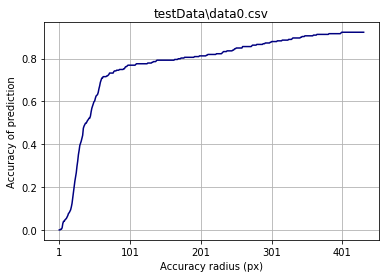

Accuracy at 50px radius : 0.6020066889632107


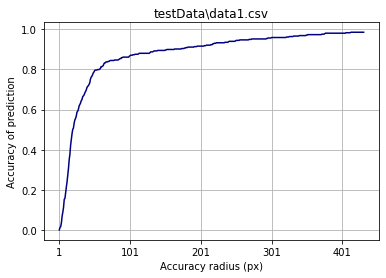

Accuracy at 50px radius : 0.7947494033412887


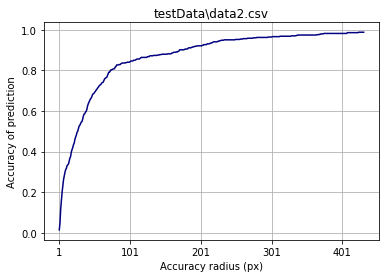

Accuracy at 50px radius : 0.6929133858267716


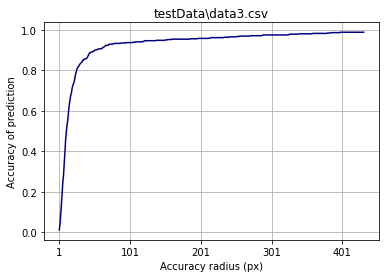

Accuracy at 50px radius : 0.8992395437262357


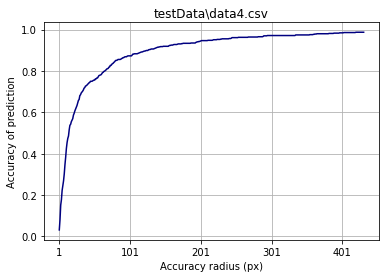

Accuracy at 50px radius : 0.7557803468208093


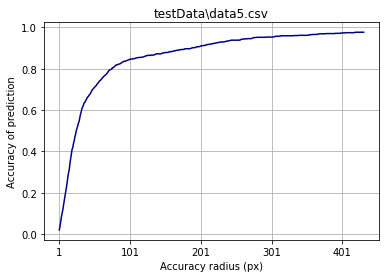

Accuracy at 50px radius : 0.711395101171459


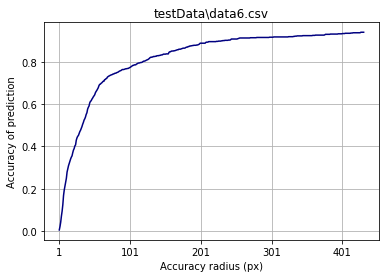

Accuracy at 50px radius : 0.6444444444444445


In [4]:
import matplotlib.pyplot as plt 

# mapping accuracy rates based on radii from actual locations
thresholdRadii = list(range(1, 432)) # 432 being the smaller of the two window dimensions
accuracies50px = []

directory = 'testData'
print('Prediction accuracy v/s Radius from actual location')
for filename in os.listdir(directory):
    
    f = os.path.join(directory, filename)
    
    if os.path.isfile(f):
        
        df = pd.read_csv(f)
        accuracyDict = dict()
        # frameGap = df['timeToFuture'].mean() * df['fps'].mean()

        for thresholdRadius in thresholdRadii:

            accuratePred = []
            for j in range(1, len(df)):

                x1 = df['currentCenterX'][j]
                y1 = df['currentCenterY'][j]
                x2 = df['predictedX'][j - 1]
                y2 = df['predictedY'][j - 1]

                if distance(x1, y1, x2, y2) < thresholdRadius:
                    accuratePred.append(True)
                else:
                    accuratePred.append(False)

                accuracy = accuratePred.count(True) / len(accuratePred)

            accuracyDict[str(thresholdRadius)] = accuracy

        accuracySeries = pd.Series(accuracyDict)
        ax = accuracySeries.plot(colormap='jet', grid=True, title=f)
        ax.set_xlabel("Accuracy radius (px)")
        ax.set_ylabel("Accuracy of prediction")
        plt.show()
        print('Accuracy at 50px radius : ' + str(accuracySeries[50]))
        accuracies50px.append((f, accuracySeries[50]))

--------------------------------------------------------------------
Accuracy data for all test cases at 50px radius from actual location
--------------------------------------------------------------------
Mean accuracy = 0.7286
Standard deviation = 0.0917
Variance = 0.0084


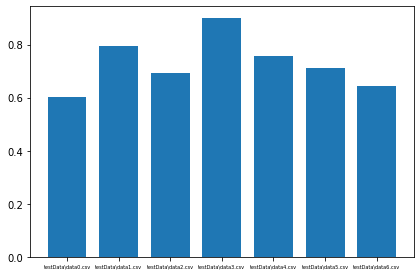

In [5]:
# visualizing the accuracy of prediction at 50 pixel radius for all test cases
accuracies50px = dict(accuracies50px)

print('--------------------------------------------------------------------')
print('Accuracy data for all test cases at 50px radius from actual location')
print('--------------------------------------------------------------------')

plt.xticks(fontsize=5)
plt.tight_layout()
plt.bar(accuracies50px.keys(), accuracies50px.values(), 0.755)

print('Mean accuracy = ' + str(np.mean(list(accuracies50px.values())))[0:6])
print('Standard deviation = ' + str(np.std(list(accuracies50px.values())))[0:6])
print('Variance = ' + str(np.var(list(accuracies50px.values())))[0:6])